<a href="https://colab.research.google.com/github/merttguney/AI_106/blob/main/AI106_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("EmlakVerisi_nan_clear.csv")
df

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,142500
2921,20,RL,0.0,8885,Pave,IR1,Low,AllPub,Inside,Mod,...,0,0,0,0,0,6,2006,WD,Normal,131000
2922,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,132000
2923,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2925 non-null   int64  
 1   MS Zoning        2925 non-null   object 
 2   Lot Frontage     2925 non-null   float64
 3   Lot Area         2925 non-null   int64  
 4   Street           2925 non-null   object 
 5   Lot Shape        2925 non-null   object 
 6   Land Contour     2925 non-null   object 
 7   Utilities        2925 non-null   object 
 8   Lot Config       2925 non-null   object 
 9   Land Slope       2925 non-null   object 
 10  Neighborhood     2925 non-null   object 
 11  Condition 1      2925 non-null   object 
 12  Condition 2      2925 non-null   object 
 13  Bldg Type        2925 non-null   object 
 14  House Style      2925 non-null   object 
 15  Overall Qual     2925 non-null   int64  
 16  Overall Cond     2925 non-null   int64  
 17  Year Built    

In [5]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [6]:
renkler =  pd.Series(['kırmızı','mavi','yeşil','mavi','kırmızı','yeşil'])
renkler

,0
0,kırmızı
1,mavi
2,yeşil
3,mavi
4,kırmızı
5,yeşil


In [7]:
pd.get_dummies(renkler)

,kırmızı,mavi,yeşil
0,True,False,False
1,False,True,False
2,False,False,True
3,False,True,False
4,True,False,False
5,False,False,True


In [8]:
pd.get_dummies(renkler, drop_first=True) # get dummies fonksiyonu, bu kategorik değerleri sayısal olarak temsil eden yeni sütunlar oluşturur.

,mavi,yeşil
0,False,False
1,True,False
2,False,True
3,True,False
4,False,False
5,False,True


In [9]:
df.select_dtypes(include='object')

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,WD,Normal
2921,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal
2922,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,NaN,NaN,NaN,NaN,NaN,Y,WD,Normal
2923,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [10]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [11]:
df_nums

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,210,62,0,0,0,0,0,5,2010,215000
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,140,0,0,0,120,0,0,6,2010,105000
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,0,0,0,4,2010,244000
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,37.0,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,120,0,0,0,0,0,0,3,2006,142500
2921,0.0,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,164,0,0,0,0,0,0,6,2006,131000
2922,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,80,32,0,0,0,0,700,7,2006,132000
2923,77.0,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,240,38,0,0,0,0,0,4,2006,170000


In [12]:
df_objs

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,WD,Normal
2921,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal
2922,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,NaN,NaN,NaN,NaN,NaN,Y,WD,Normal
2923,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [13]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2925 non-null   float64
 1   Lot Area         2925 non-null   int64  
 2   Overall Qual     2925 non-null   int64  
 3   Overall Cond     2925 non-null   int64  
 4   Year Built       2925 non-null   int64  
 5   Year Remod/Add   2925 non-null   int64  
 6   Mas Vnr Area     2925 non-null   float64
 7   BsmtFin SF 1     2925 non-null   float64
 8   BsmtFin SF 2     2925 non-null   float64
 9   Bsmt Unf SF      2925 non-null   float64
 10  Total Bsmt SF    2925 non-null   float64
 11  1st Flr SF       2925 non-null   int64  
 12  2nd Flr SF       2925 non-null   int64  
 13  Low Qual Fin SF  2925 non-null   int64  
 14  Gr Liv Area      2925 non-null   int64  
 15  Bsmt Full Bath   2925 non-null   float64
 16  Bsmt Half Bath   2925 non-null   float64
 17  Full Bath     

In [14]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [15]:
df_objs

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2921,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2922,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2923,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [16]:
final_df = pd.concat([df_nums,df_objs],axis=1)

In [17]:
final_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,False,False,False,False,True,False,False,False,True,False
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,False,False,False,False,True,False,False,False,True,False
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,False,False,False,False,True,False,False,False,True,False
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,False,False,False,False,True,False,False,False,True,False
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,37.0,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,False,False,False,False,True,False,False,False,True,False
2921,0.0,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,False,False,False,False,True,False,False,False,True,False
2922,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,False,False,False,False,True,False,False,False,True,False
2923,77.0,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,False,False,False,False,True,False,False,False,True,False


In [18]:
final_df.to_csv("final_emlak_veriseti.csv", index=False)

# **Makine Öğrenimi**

$$ y=b1x + b0 $$

$$
b1= \frac {\sum_{i = 1}^{n}{(\ x_i - \bar{x})(\ y_i - \bar{y})}}   {\sum_{i = 1}^{n}{(x_i - \bar{x})^2}}
$$

$$ b0= \bar{y} - b1\bar{x} $$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x = np.array([34,35, 39, 42, 43,47])
y = np.array([102,109, 137, 148, 150,158])

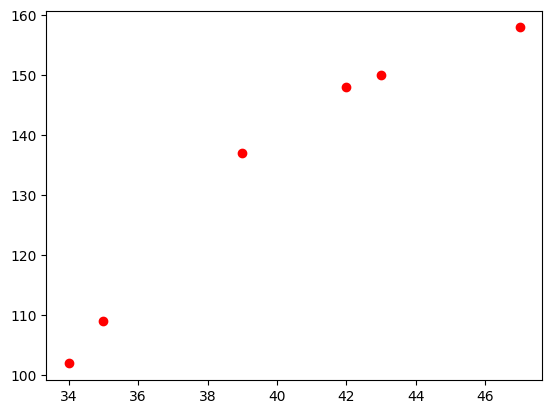

In [4]:
plt.plot(x,y, "or")

In [5]:
x_ortalama = x.mean()
x_ortalama

np.float64(40.0)

In [6]:
y_ortalama = y.mean()
y_ortalama

np.float64(134.0)

$$
(\ x_i - \bar{x})
$$

In [7]:
x_ort_fark = x - x_ortalama
x_ort_fark

array([-6., -5., -1.,  2.,  3.,  7.])

$$
(\ y_i - \bar{y})
$$

In [8]:
y_ort_fark = y - y_ortalama
y_ort_fark

array([-32., -25.,   3.,  14.,  16.,  24.])

$$
(\ x_i - \bar{x})(\ y_i - \bar{y})
$$

In [9]:
fark_carpim = x_ort_fark * y_ort_fark
fark_carpim

array([192., 125.,  -3.,  28.,  48., 168.])

$$
\sum_{i = 1}^{n}{(\ x_i - \bar{x})(\ y_i - \bar{y})}
$$

In [10]:
# Burada da sigma notation kullanarak toplama işlemi yaptırdık.
fark_carpim_toplam = fark_carpim.sum()
fark_carpim_toplam

np.float64(558.0)

$$
{(x_i - \bar{x})^2}
$$

In [11]:
x_farkin_karesi = np.power(x_ort_fark, 2)
x_farkin_karesi

array([36., 25.,  1.,  4.,  9., 49.])

$$
\sum_{i = 1}^{n}{(x_i - \bar{x})^2}
$$

In [12]:
x_farkin_karesi_toplami = x_farkin_karesi.sum()
x_farkin_karesi_toplami

np.float64(124.0)

$$ b0= \bar{y} - b1\bar{x} $$

In [13]:
b1 = fark_carpim_toplam / x_farkin_karesi_toplami
b1

np.float64(4.5)

In [14]:
# buradan b1'i 4.5 bulduk şimdi de yerine koyarız.
b0= y_ortalama - 4.5*x_ortalama
b0

np.float64(-46.0)

# Son Hali de => $$
y=4.5x - 46
$$

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
x

array([34, 35, 39, 42, 43, 47])

In [17]:
x = x.reshape((-1, 1))

In [18]:
x

array([[34],
       [35],
       [39],
       [42],
       [43],
       [47]])

In [19]:
y = y.reshape((-1, 1))

In [20]:
y

array([[102],
       [109],
       [137],
       [148],
       [150],
       [158]])

In [21]:
reg = LinearRegression()
model = reg.fit(x, y)
print(model.intercept_)
print(model.coef_)

[-46.]
[[4.5]]


In [22]:
y2 = model.coef_ * x + model.intercept_

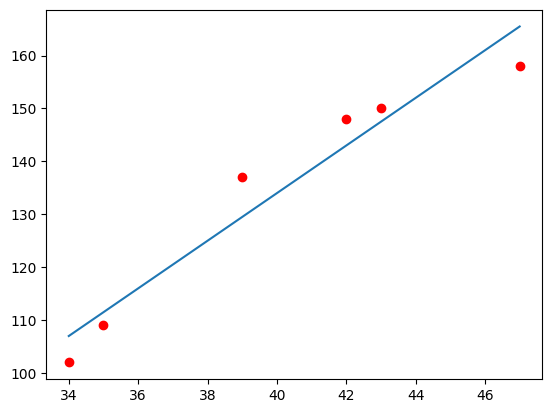

In [23]:
plt.plot(x,y, "or")
plt.plot(x,y2)

# linear Regression

In [24]:
df = pd.read_csv("https://raw.githubusercontent.com/zaferdemirkol/HerkesIcinYapayZeka/main/Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [25]:
df["total_spend"] = df["TV"] + df["radio"] + df["newspaper"]

In [26]:
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [27]:
import seaborn as sns

<Axes: xlabel='total_spend', ylabel='sales'>

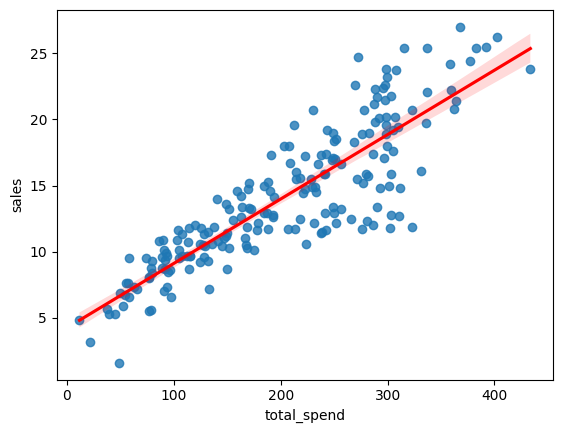

In [28]:
sns.regplot(data=df, x="total_spend",y="sales",line_kws={"color": "red"})

In [29]:
x = df["total_spend"]
y = df["sales"]

In [30]:
np.polyfit(x, y, deg=1)

array([0.04868788, 4.24302822])

In [31]:
harcama_noktalari = np.linspace(0, 500, 100)

In [32]:
satis_tahmini= 0.04868788*harcama_noktalari + 4.24302822

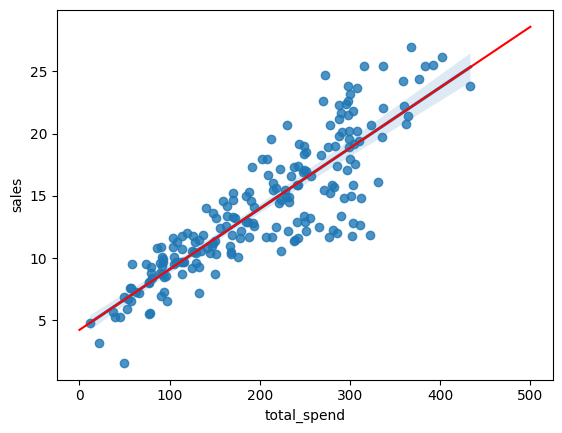

In [33]:
sns.regplot(x="total_spend", y="sales", data=df)
plt.plot(harcama_noktalari,satis_tahmini, color="red")

In [34]:
harcama=200
satis_tahmini= 0.04868788*harcama + 4.24302822
satis_tahmini

13.98060422

In [35]:
np.polyfit(x, y, deg=3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [36]:
pot_harcama = np.linspace(0, 500, 100)
pot_harcama

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [37]:
satis_tahmini = 3.07615033e-07*pot_harcama**3 + -0.00018939 * pot_harcama**2 + 0.08208863   * pot_harcama + 2.70495053

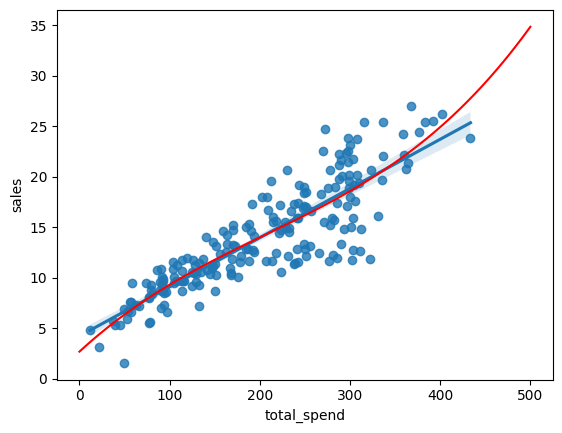

In [38]:
sns.regplot(x="total_spend", y="sales", data=df)
plt.plot(pot_harcama,satis_tahmini, color="red")

In [39]:
df = pd.read_csv("https://raw.githubusercontent.com/zaferdemirkol/HerkesIcinYapayZeka/main/Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


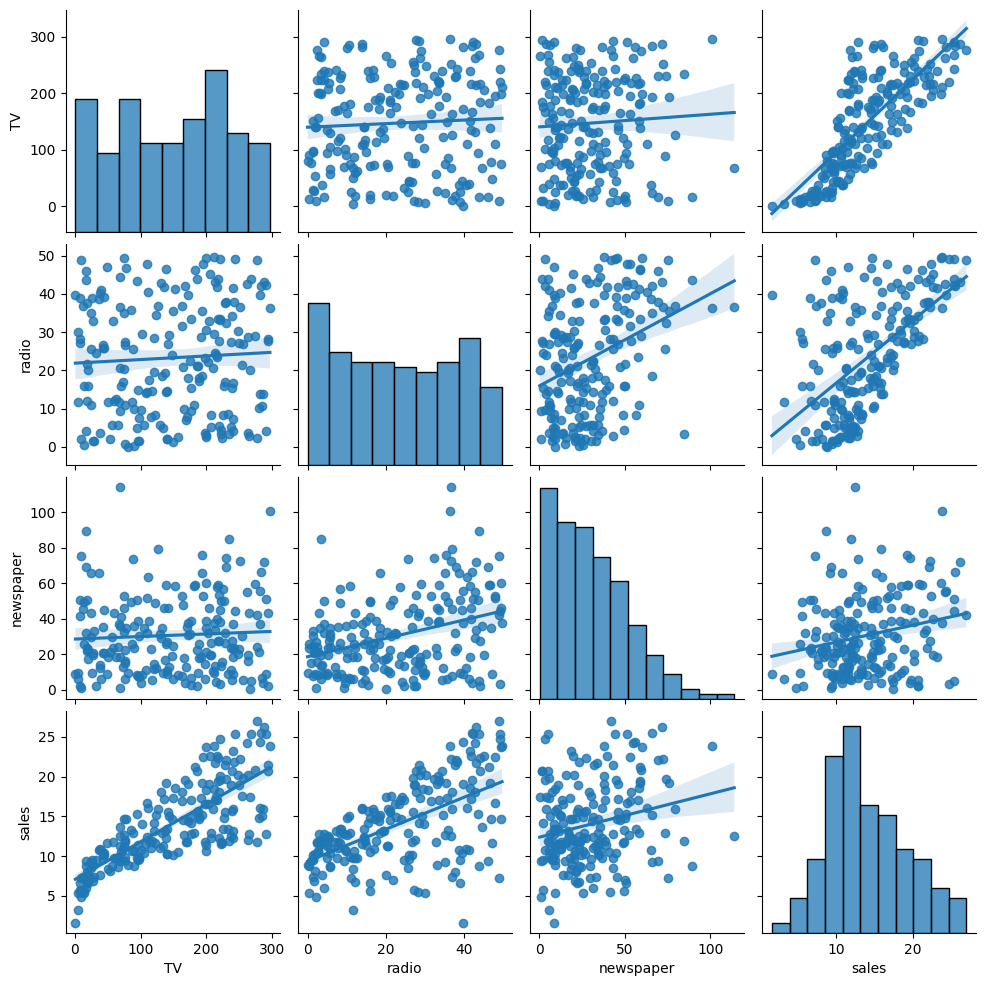

In [40]:
sns.pairplot(df, kind  ="reg")

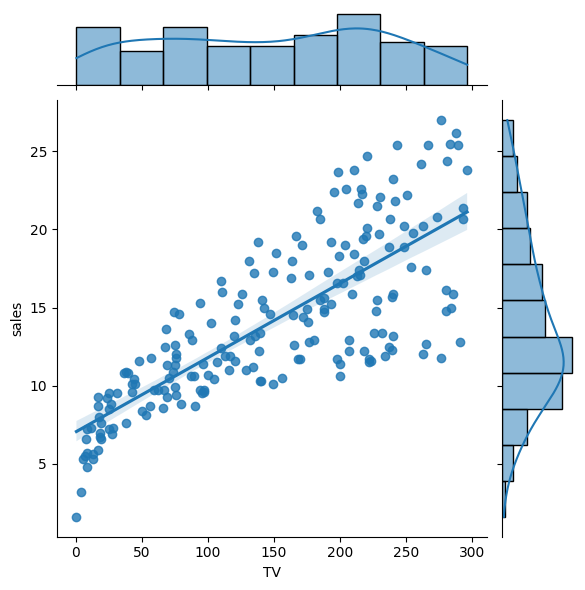

In [41]:
sns.jointplot(x="TV", y="sales", data=df, kind="reg")

In [42]:
X = df[["TV"]]
y = df["sales"]

In [43]:
reg = LinearRegression()
model = reg.fit(X, y)

In [44]:
model.intercept_

np.float64(7.032593549127695)

In [45]:
model.coef_

array([0.04753664])

$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$

R-kare = 1 - (SSR / SST)

In [46]:
model.score(X,y)

0.611875050850071

In [47]:
y_tahmin= model.predict(X)

In [48]:
y_tahmin

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

In [49]:
7.03 + 30*0.04

8.23

In [50]:
model.predict([[30]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.45869276])

**Mean Absolute Error** (MAE)
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$


**Mean Squared Error** (MSE) karesi alınmış hataların ortalamasıdır:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$


**Root Mean Squared Error** (RMSE), karesi alınmış hataların ortalamasının karekökü:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [52]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Ödev

Aşağıdaki veriyi makine öğrenimi modeli oluşturmak için hazır hale getirin.

In [55]:
"""

"metre_kare","reklam_tarihi","reklam_fiyati","satis_tarihi","satis_fiyati","kategori","Alici","Bolge"
700,"10.05.2023",400000.0,"1.6.2023",400000.0,"Daire","Murat",
2538,"04.05.2023",1200000.0,"8.5.2023",1215000.0,"Müstakil","Ayşe",
1836,"12.05.2023",853000.0,"30.5.2023",850000.0,"Müstakil","Selen",
1836,"12.05.2023",853000.0,"30.5.2023",850000.0,"Müstakil","Serdar",
4234,"14.05.2023",3000500.0,"1.6.2023",3001000.0,,"Ayhan",
3471,"15.05.2023",4250000.0,"29.6.2023",4000000.0,"Müstakil","Ferdi",
2475,"10.06.2023",2550000.0,"4.6.2023",2550000.0,"Müstakil","Tülay",
4597,,4598000.0,"15.6.2023",12000000.0,"Daire","Selin",
717,"06.06.2023",12000000.0,,5000000.0,,"Ahmet",
2749,"15.06.2023",,,,,,

"""


'\n"metre_kare","reklam_tarihi","reklam_fiyati","satis_tarihi","satis_fiyati","kategori","Alici","Bolge"\n700,"10.05.2023",400000.0,"1.6.2023",400000.0,"Daire","Murat",\n2538,"04.05.2023",1200000.0,"8.5.2023",1215000.0,"Müstakil","Ayşe",\n1836,"12.05.2023",853000.0,"30.5.2023",850000.0,"Müstakil","Selen",\n1836,"12.05.2023",853000.0,"30.5.2023",850000.0,"Müstakil","Serdar",\n4234,"14.05.2023",3000500.0,"1.6.2023",3001000.0,,"Ayhan",\n3471,"15.05.2023",4250000.0,"29.6.2023",4000000.0,"Müstakil","Ferdi",\n2475,"10.06.2023",2550000.0,"4.6.2023",2550000.0,"Müstakil","Tülay",\n4597,,4598000.0,"15.6.2023",12000000.0,"Daire","Selin",\n717,"06.06.2023",12000000.0,,5000000.0,,"Ahmet",\n2749,"15.06.2023",,,,,,\n\n'